In [1]:
import os
import utilities as rocku
import matplotlib.pyplot as plt
import numpy as np
import multiprocessing as mp
import timeit
from pystackreg import StackReg
from PIL import Image
import dxchange
from tqdm import tqdm

In [2]:
ncore = mp.cpu_count()
ncore

64

In [3]:
# need to change
ipts="28402"
# scan_type = 'ct_scans'
# scan_type = 'radiographs'
scan_type = 'processed_data/normalized'
# scan_type = 'analysis'
# scan_type = 'analysis'
####################################
##################################
scan_loc = "/HFIR/CG1D/IPTS-"+ipts+"/shared/" + scan_type
folder_list = os.listdir(scan_loc)
folder_list.sort()
folder_list

['2023_09_06_exsitu',
 '2023_09_06_insitu_60s',
 '2023_09_06_insitu_60s_binned_by_10',
 '2023_09_06_insitu_60s_binned_by_5',
 '2023_09_06_insitu_60s_binned_by_5_left',
 '2023_09_06_insitu_60s_binned_by_5_right',
 '2023_09_07_insitu_60s',
 '2023_09_07_insitu_60s_binned_by_5',
 '2023_09_07_insitu_60s_binned_by_5_left',
 '2023_09_07_insitu_60s_binned_by_5_right']

In [73]:
sample_name = "2023_09_07_insitu_60s_binned_by_5_right"
######################
######################
######################
scan_dir = os.path.join(scan_loc, sample_name)
fname_list = os.listdir(scan_dir)
fname_list.sort()
fname_list

['20230907_cells_t_discharge_0060_1534.tiff',
 '20230907_cells_t_discharge_0060_1539.tiff',
 '20230907_cells_t_discharge_0060_1544.tiff',
 '20230907_cells_t_discharge_0060_1549.tiff',
 '20230907_cells_t_discharge_0060_1554.tiff',
 '20230907_cells_t_discharge_0060_1559.tiff',
 '20230907_cells_t_discharge_0060_1564.tiff',
 '20230907_cells_t_discharge_0060_1569.tiff',
 '20230907_cells_t_discharge_0060_1574.tiff',
 '20230907_cells_t_discharge_0060_1579.tiff',
 '20230907_cells_t_discharge_0060_1584.tiff',
 '20230907_cells_t_discharge_0060_1589.tiff',
 '20230907_cells_t_discharge_0060_1594.tiff',
 '20230907_cells_t_discharge_0060_1599.tiff',
 '20230907_cells_t_discharge_0060_1604.tiff',
 '20230907_cells_t_discharge_0060_1609.tiff',
 '20230907_cells_t_discharge_0060_1614.tiff',
 '20230907_cells_t_discharge_0060_1619.tiff',
 '20230907_cells_t_discharge_0060_1624.tiff',
 '20230907_cells_t_discharge_0060_1629.tiff',
 '20230907_cells_t_discharge_0060_1634.tiff',
 '20230907_cells_t_discharge_0060_

In [74]:
img_stack = rocku.read_img_stack(scan_dir, fname_list, flipud=False)
trans_algo_dict = {
    'TRANSLATION': StackReg.TRANSLATION,
    'RIGID_BODY': StackReg.RIGID_BODY,
    'SCALED_ROTATION': StackReg.SCALED_ROTATION,
    'AFFINE': StackReg.AFFINE,
    'BILINEAR': StackReg.BILINEAR
}

225it [00:03, 58.73it/s]


Text(0.5, 1.0, 'diff image')

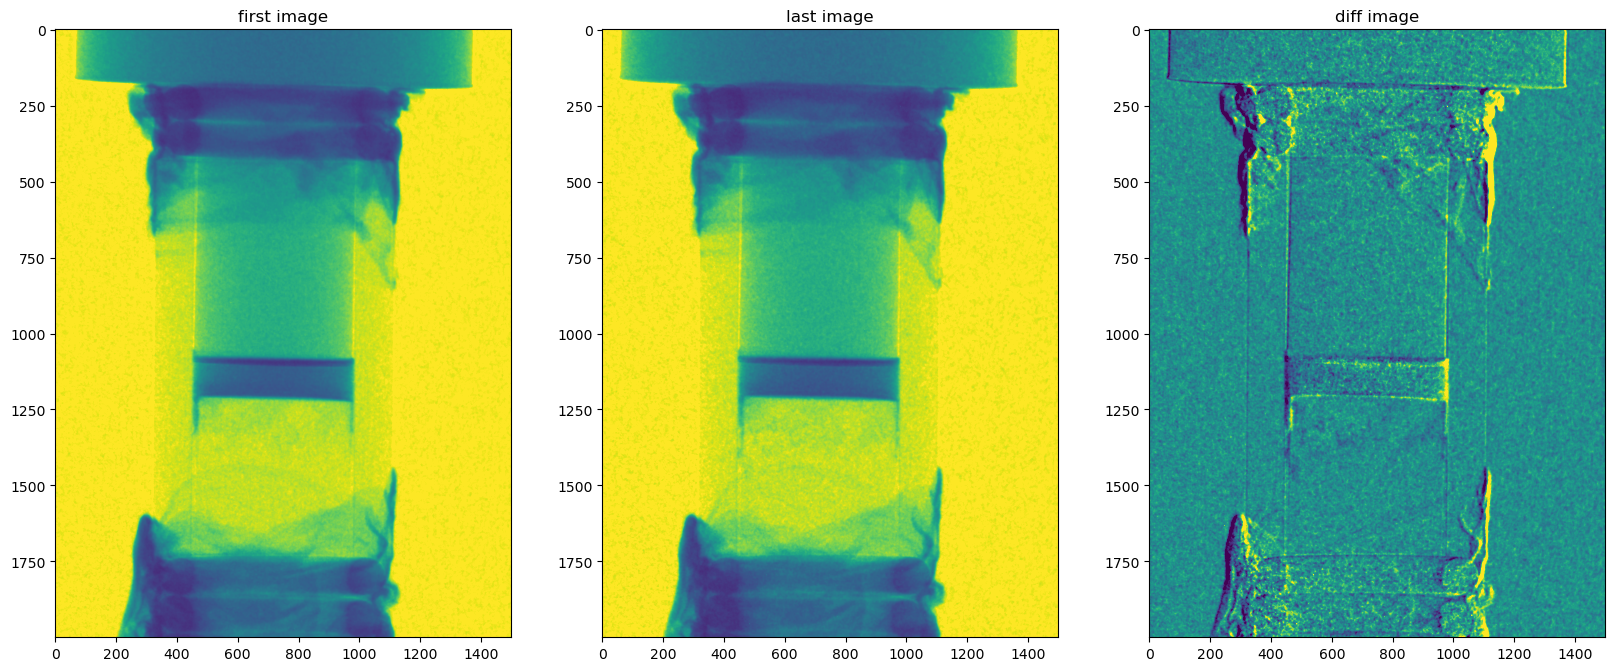

In [75]:
#load reference and "moved" image
ref = img_stack[0]
mov = img_stack[-1]

f, ax = plt.subplots(1, 3, figsize=(20, 20))
ax[0].imshow(ref, vmin=0, vmax=1)
ax[0].set_title('first image')

ax[1].imshow(mov, vmin=0, vmax=1)
ax[1].set_title('last image')

ax[2].imshow(np.divide(mov, ref), vmin=0.8, vmax=1.2)
ax[2].set_title('diff image')

Text(0.5, 1.0, 'diff image')

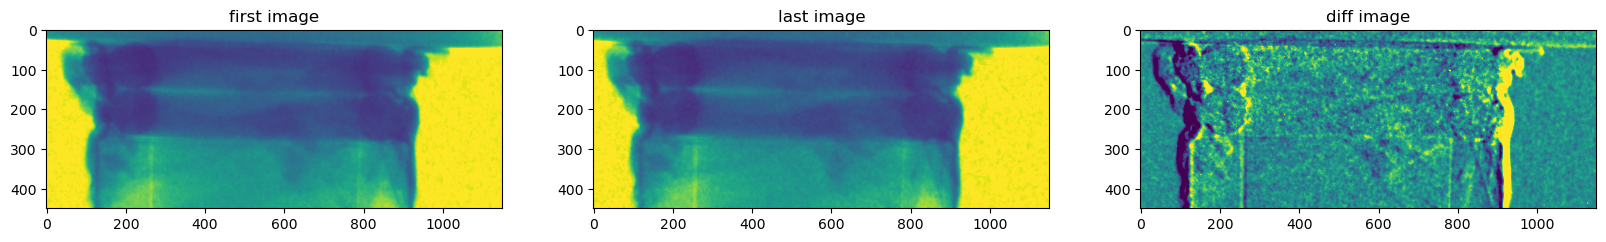

In [84]:
###################### need to change start
roi = True
roi_left = 200
roi_right = 1350
roi_top = 150
roi_bottom = 600
# roi_left = 250
# roi_right = 1350
# roi_top = 900
# roi_bottom = 1350
###################### need to change end
img_stack_roi = rocku.crop(img_stack, roi_left, roi_right, roi_top, roi_bottom, roi)
ref_roi = img_stack_roi[0]
mov_roi = img_stack_roi[-1]

f, ax = plt.subplots(1, 3, figsize=(20, 20))
ax[0].imshow(ref_roi, vmin=0, vmax=1)
ax[0].set_title('first image')

ax[1].imshow(mov_roi, vmin=0, vmax=1)
ax[1].set_title('last image')

ax[2].imshow(np.divide(mov_roi, ref_roi), vmin=0.8, vmax=1.2)
ax[2].set_title('diff image')

Text(0.5, 1.0, 'diff image')

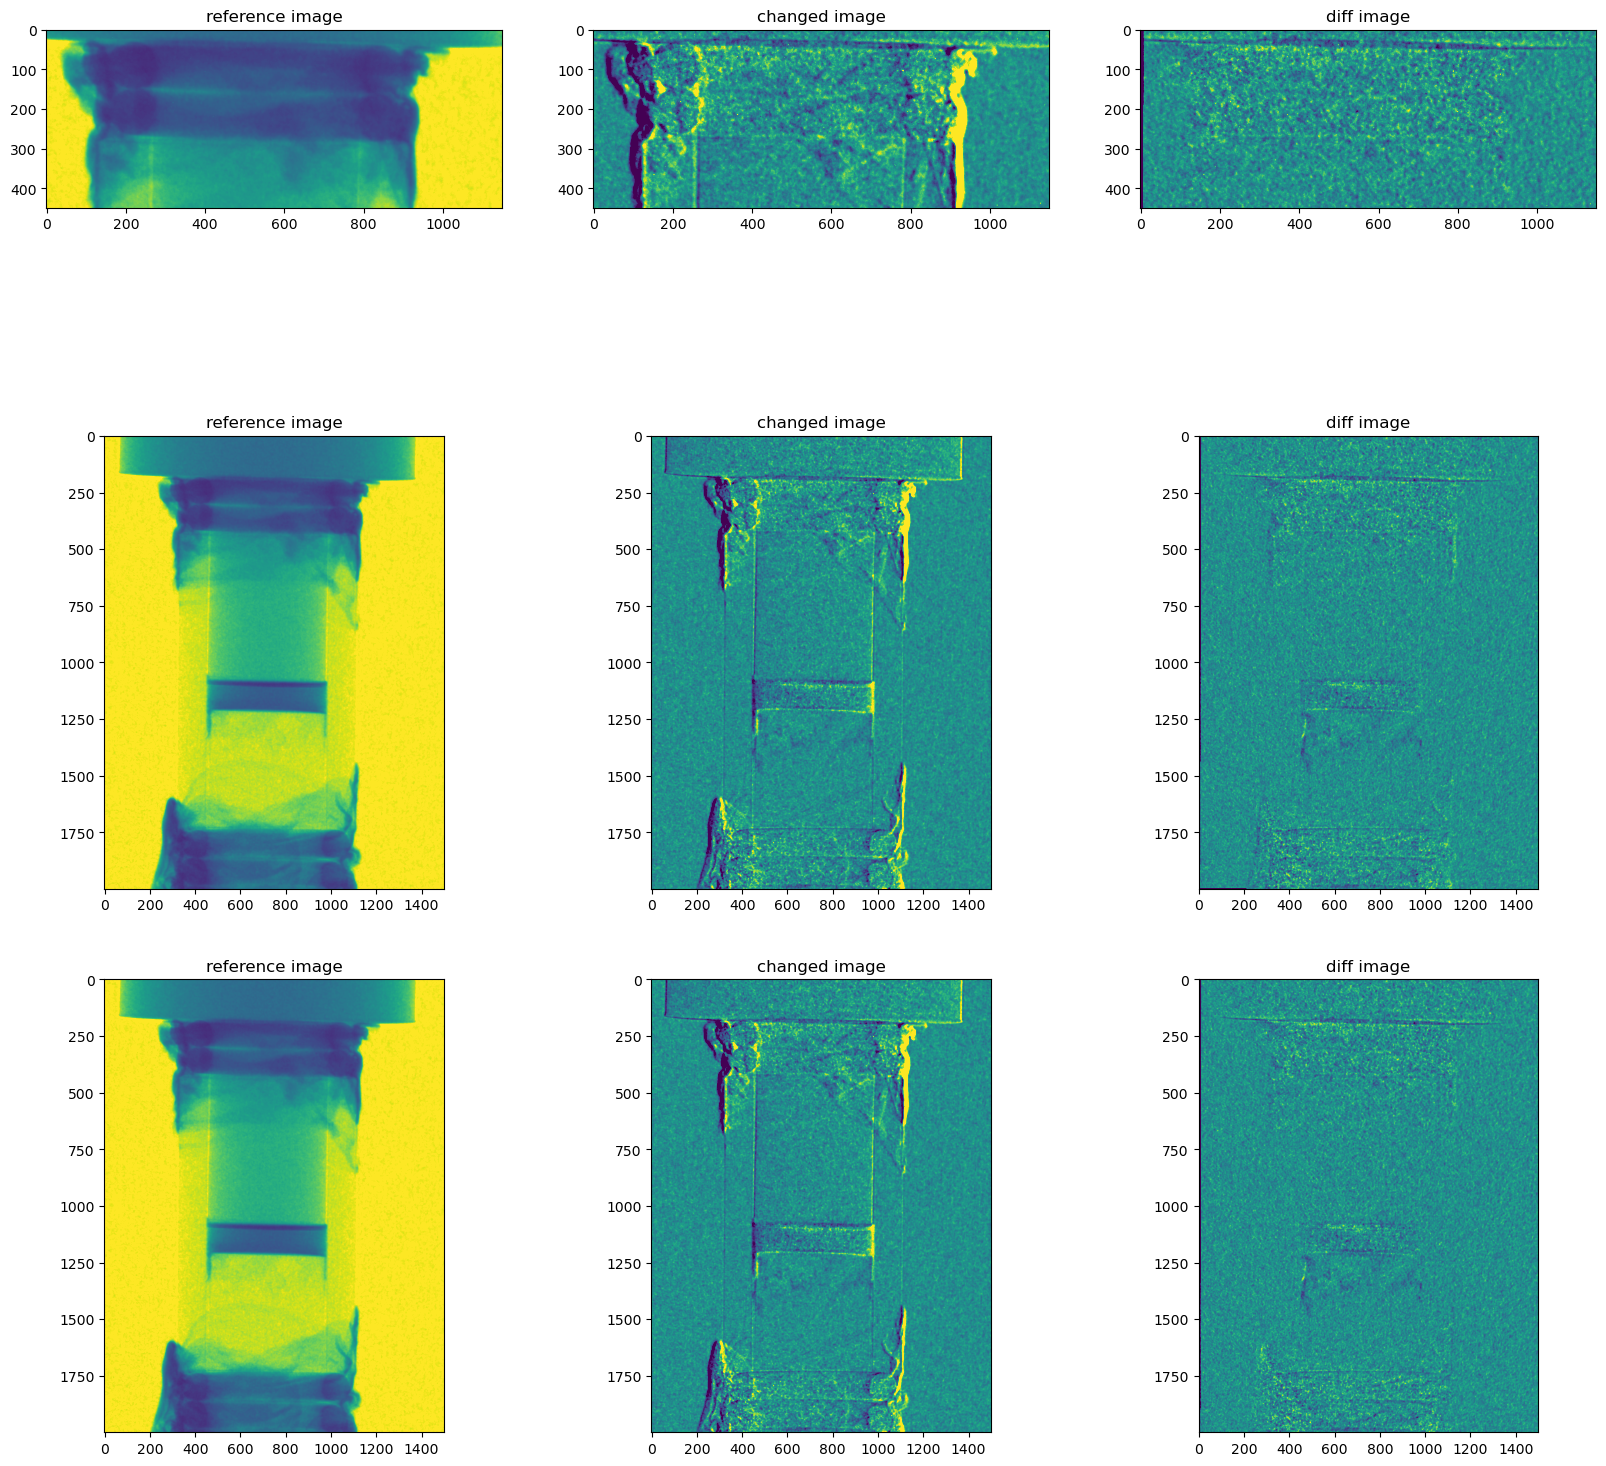

In [85]:
trans_algo = 'RIGID_BODY'
# trans_algo = 'TRANSLATION'
#########################
#########################
sr = StackReg(trans_algo_dict[trans_algo])

reg_roi = sr.register_transform(ref_roi, mov_roi)
reg_roi = reg_roi.clip(min=0)
reg_roi_trans = sr.transform(mov=mov)

reg = sr.register_transform(ref, mov)
reg = reg.clip(min=0)

f, ax = plt.subplots(3, 3, figsize=(20, 20))
ax[0][0].imshow(ref_roi, vmin=0, vmax=1)
ax[0][0].set_title('reference image')

ax[0][1].imshow(np.divide(mov_roi, ref_roi), vmin=0.8, vmax=1.2)
ax[0][1].set_title('changed image')

ax[0][2].imshow(np.divide(reg_roi, ref_roi), vmin=0.8, vmax=1.2)
ax[0][2].set_title('diff image')

ax[1][0].imshow(ref, vmin=0, vmax=1)
ax[1][0].set_title('reference image')

ax[1][1].imshow(np.divide(mov, ref), vmin=0.8, vmax=1.2)
ax[1][1].set_title('changed image')

ax[1][2].imshow(np.divide(reg, ref), vmin=0.8, vmax=1.2)
ax[1][2].set_title('diff image')

ax[2][0].imshow(ref, vmin=0, vmax=1)
ax[2][0].set_title('reference image')

ax[2][1].imshow(np.divide(mov, ref), vmin=0.8, vmax=1.2)
ax[2][1].set_title('changed image')

ax[2][2].imshow(np.divide(reg_roi_trans, ref), vmin=0.8, vmax=1.2)
ax[2][2].set_title('diff image')

In [79]:
sr = StackReg(trans_algo_dict[trans_algo])
size = (img_stack.shape[0], img_stack.shape[1], img_stack.shape[2])

reg_stack = np.empty(size, dtype=img_stack.dtype)
reg_stack[0] = img_stack[0][:]
for idx in tqdm(range(size[0])):
    if idx != 0:
        _reg_roi = sr.register_transform(img_stack_roi[0], img_stack_roi[idx])
        _reg = sr.transform(img_stack[idx])
        _reg = _reg.clip(min=0)
        reg_stack[idx] = _reg[:]

100%|█████████████████████████████████████████| 225/225 [04:01<00:00,  1.07s/it]


In [80]:
reg_ratio = np.divide(reg_stack, np.mean([reg_stack[0], reg_stack[1]], axis=0))

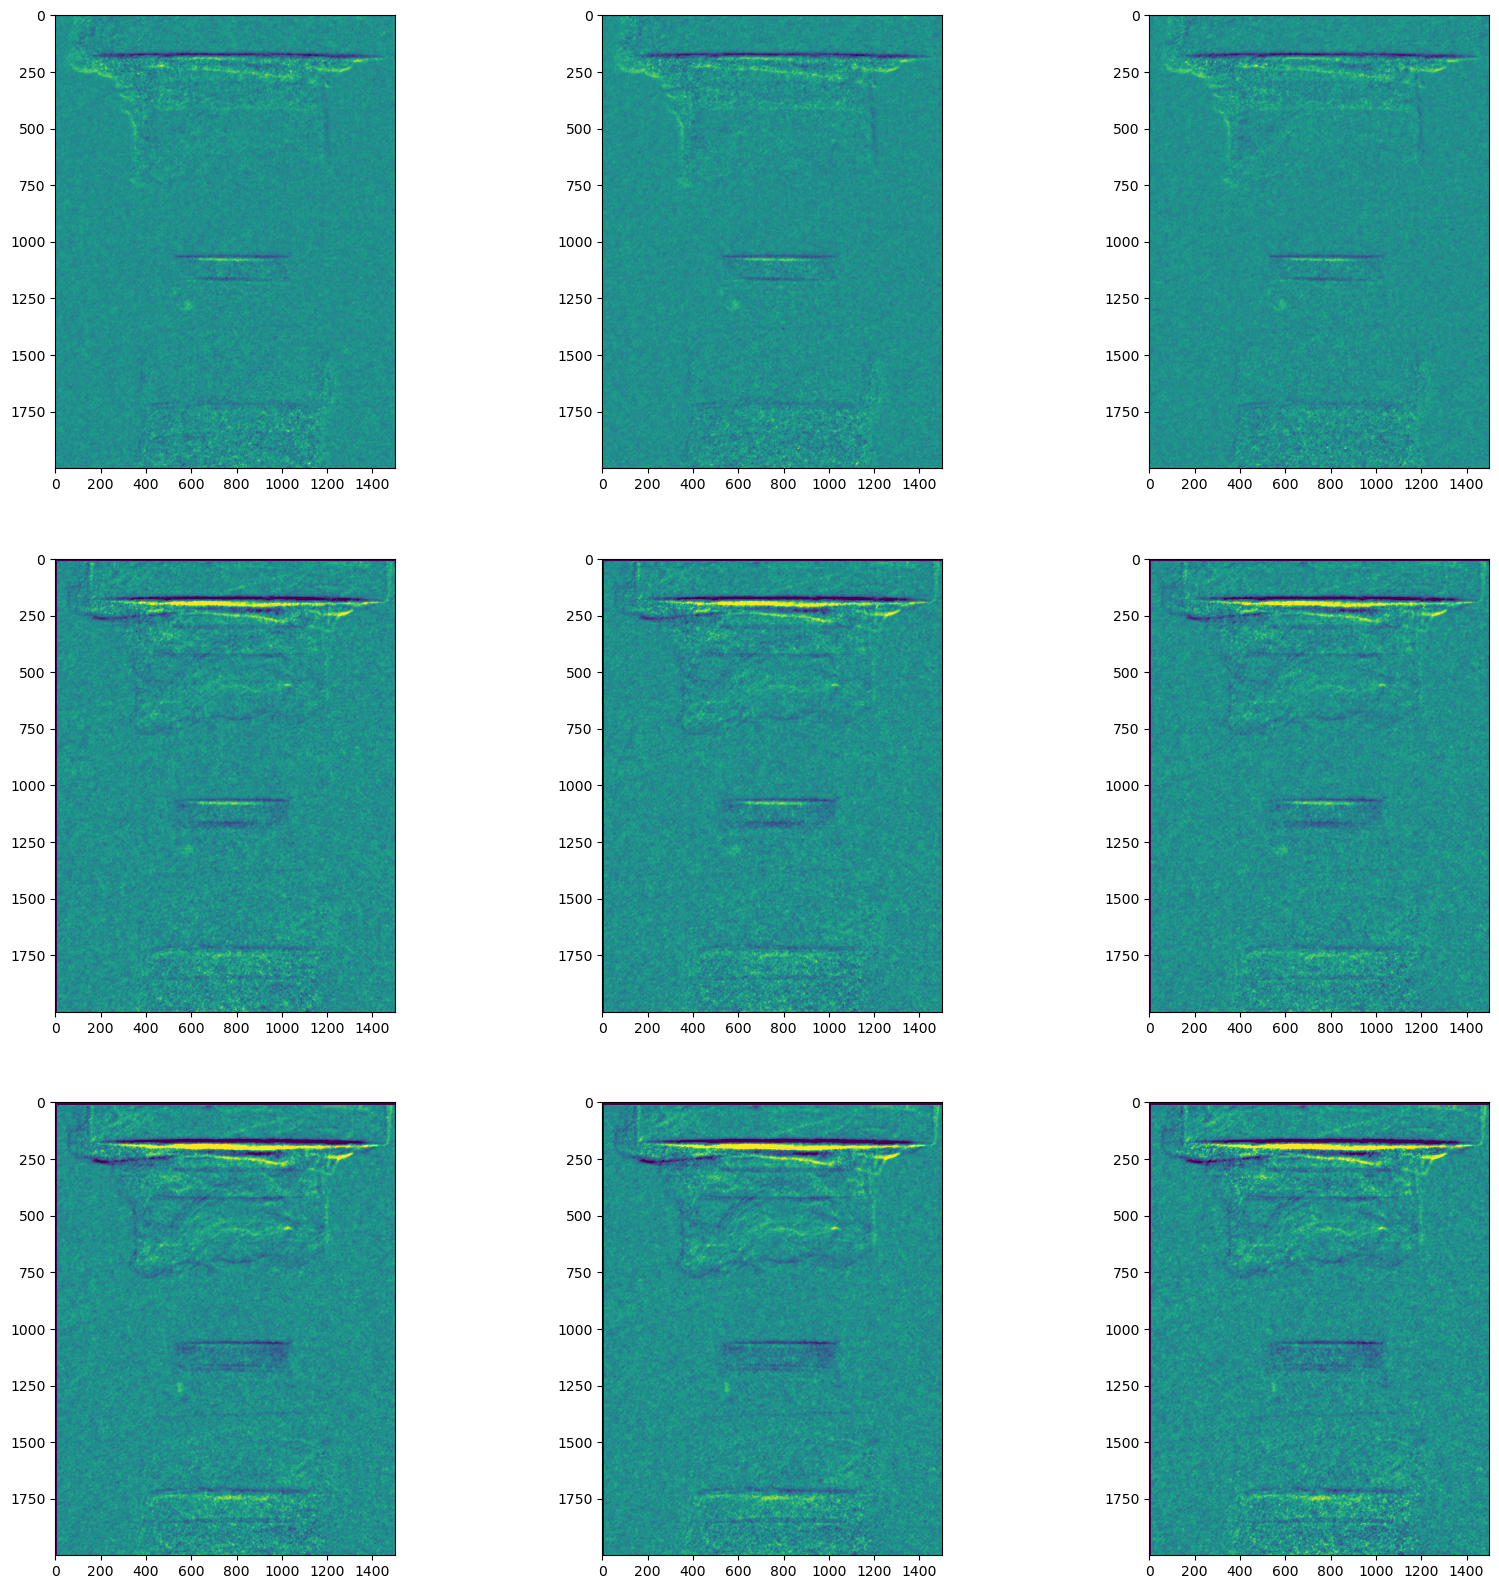

In [41]:
f, ax = plt.subplots(3, 3, figsize=(20, 20))

ax[0][0].imshow(reg_ratio[100], vmin=0.8, vmax=1.2)
ax[0][1].imshow(reg_ratio[101], vmin=0.8, vmax=1.2)
ax[0][2].imshow(reg_ratio[102], vmin=0.8, vmax=1.2)

ax[1][0].imshow(reg_ratio[250], vmin=0.8, vmax=1.2)
ax[1][1].imshow(reg_ratio[251], vmin=0.8, vmax=1.2)
ax[1][2].imshow(reg_ratio[252], vmin=0.8, vmax=1.2)

ax[2][0].imshow(reg_ratio[-3], vmin=0.8, vmax=1.2)
ax[2][1].imshow(reg_ratio[-2], vmin=0.8, vmax=1.2)
ax[2][2].imshow(reg_ratio[-1], vmin=0.8, vmax=1.2)

# Save files

In [81]:
save_to = scan_dir + '_aligned_' + trans_algo
save_to_ratio = scan_dir + '_ratio'

###############################
###############################
if not os.path.exists(save_to):
    os.mkdir(save_to)
if not os.path.exists(save_to_ratio):
    os.mkdir(save_to_ratio)
print("Saving to '{}' ...".format(save_to))
print("Saving to '{}' ...".format(save_to_ratio))
for i, e_name in tqdm(enumerate(fname_list)):
    fname = save_to + "/" + e_name
    img_pl = Image.fromarray(reg_stack[i])
    img_pl.save(fname)
    fname_ratio = save_to_ratio + "/" + e_name
    img_pl_ratio = Image.fromarray(reg_ratio[i])
    img_pl_ratio.save(fname_ratio)

Saving to '/HFIR/CG1D/IPTS-28402/shared/processed_data/normalized/2023_09_07_insitu_60s_binned_by_5_right_aligned_RIGID_BODY' ...
Saving to '/HFIR/CG1D/IPTS-28402/shared/processed_data/normalized/2023_09_07_insitu_60s_binned_by_5_right_ratio' ...


225it [00:28,  7.83it/s]
